<a href="https://colab.research.google.com/github/ferrarimarlon/einsteinGPT-IA-Tradicional/blob/main/QI_EINSTEIN_MANUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

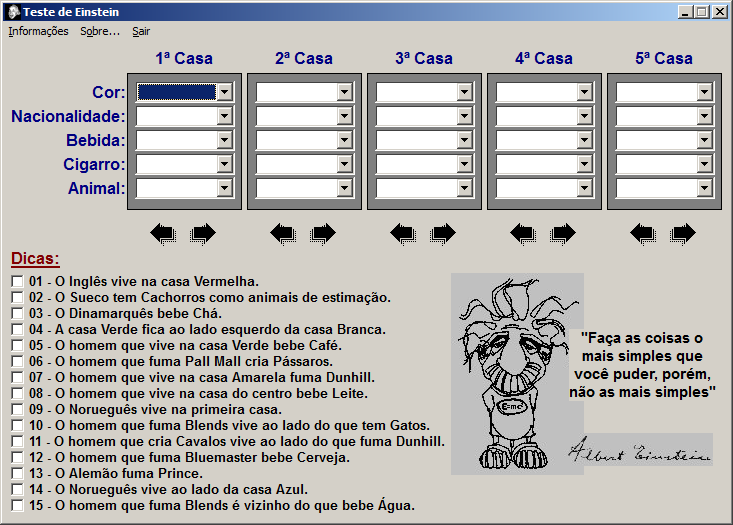

In [ ]:
regras = '''
O Inglês vive na casa Vermelha.
O Sueco tem Cachorros como animais de estimação.
O Dinamarquês bebe Chá.
A casa Verde fica do lado esquerdo da casa Branca.
O homem que vive na casa Verde bebe Café.
O homem que fuma Pall Mall cria Pássaros.
O homem que vive na casa Amarela fuma Dunhill.
O homem que vive na casa do meio bebe Leite.
O Norueguês vive na primeira casa.
O homem que fuma Blends vive ao lado do que tem Gatos.
O homem que cria Cavalos vive ao lado do que fuma Dunhill.
O homem que fuma Blue Master bebe Cerveja.
O Alemão fuma Prince.
O Norueguês vive ao lado da casa Azul.
O homem que fuma Blends é vizinho do que bebe Água.
'''

In [ ]:
cores = []
nacionalidades = []
bebidas = []
cigarros = []
animais = []

In [ ]:
cores = ['Vermelha', 'Verde', 'Branca', 'Amarela', 'Azul']
nacionalidades = ['Inglês', 'Sueco', 'Dinamarquês', 'Norueguês', 'Alemão']
bebidas = ['Chá', 'Café', 'Leite', 'Cerveja', 'Água']
cigarros = ['Pall Mall', 'Dunhill', 'Blends', 'Blue Master', 'Prince']
animais = ['Cachorros', 'Pássaros', 'Gatos', 'Cavalos']

## Programação com Restrição - Constraint Programming
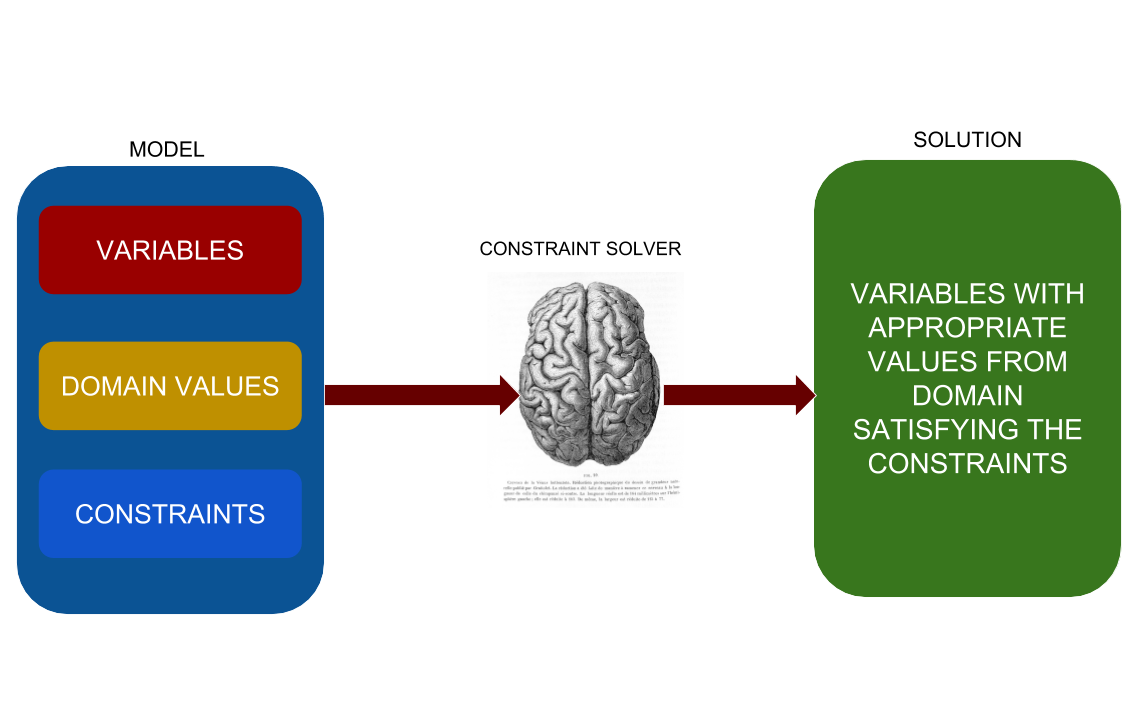

## Solver: Backintrack

<p>Backtracking é um algoritmo genérico que busca, por força bruta, soluções possíveis para problemas computacionais (tipicamente problemas de satisfações à restrições).

<p>De maneira incremental, busca por candidatos à soluções e abandona cada candidato parcial C quando C não pode resultar em uma solução válida.
Quando sua busca chega a uma extremidade da estrutura de dados, como um nó terminal de uma árvore, o algoritmo realiza um retrocesso tipicamente implementado através de uma recursão.

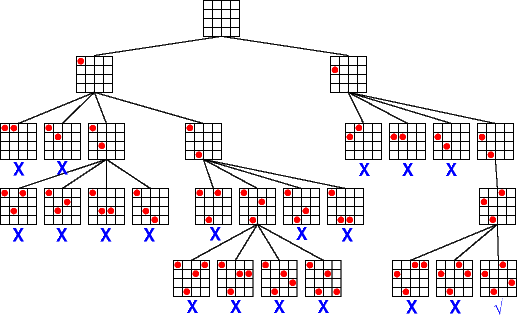

In [ ]:
!pip install python-constraint

In [ ]:
from constraint import *
qi_einstein = Problem()

criterios = cores+nacionalidades+bebidas+cigarros+animais
qi_einstein.addVariables(criterios,[1,2,3,4,5])

In [ ]:
qi_einstein.addConstraint(AllDifferentConstraint(), cores)
qi_einstein.addConstraint(AllDifferentConstraint(), nacionalidades)
qi_einstein.addConstraint(AllDifferentConstraint(), bebidas)
qi_einstein.addConstraint(AllDifferentConstraint(), cigarros)
qi_einstein.addConstraint(AllDifferentConstraint(), animais)

In [ ]:
qi_einstein.getSolver()

In [ ]:
qi_einstein.addConstraint(lambda x, y: x == y, ["Inglês","Vermelha"])
qi_einstein.addConstraint(lambda x, y: x == y, ("Sueco","Cachorros"))
qi_einstein.addConstraint(lambda x, y: x == y, ("Dinamarquês","Chá"))
qi_einstein.addConstraint(lambda x, y: x == y, ("Verde","Café"))
qi_einstein.addConstraint(lambda x, y: x-y == 1, ("Verde","Branca"))
qi_einstein.addConstraint(lambda x, y: x == y, ("Pall Mall","Pássaros"))
qi_einstein.addConstraint(lambda x, y: x == y, ("Amarela","Dunhill"))
qi_einstein.addConstraint(InSetConstraint([3]), ["Leite"])
qi_einstein.addConstraint(InSetConstraint([1]), ["Norueguês"])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Blends","Gatos"))
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Cavalos","Dunhill"))
qi_einstein.addConstraint(lambda x, y: x == y, ["Blue Master","Cerveja"])
qi_einstein.addConstraint(lambda x, y: x == y, ["Alemão","Prince"])
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Norueguês","Azul"))
qi_einstein.addConstraint(lambda x, y: abs(x-y) == 1, ("Blends","Água"))

solucoes = qi_einstein.getSolutions()[0]

In [ ]:
qi_einstein.getSolutions()

[{'Blends': 2,
  'Dunhill': 1,
  'Verde': 5,
  'Amarela': 1,
  'Branca': 4,
  'Café': 5,
  'Cavalos': 2,
  'Norueguês': 1,
  'Azul': 2,
  'Vermelha': 3,
  'Inglês': 3,
  'Gatos': 1,
  'Água': 1,
  'Alemão': 5,
  'Prince': 5,
  'Blue Master': 4,
  'Cerveja': 4,
  'Pall Mall': 3,
  'Pássaros': 3,
  'Cachorros': 4,
  'Sueco': 4,
  'Dinamarquês': 2,
  'Chá': 2,
  'Leite': 3}]

In [ ]:
solucoes.items()

dict_items([('Blends', 2), ('Dunhill', 1), ('Verde', 5), ('Amarela', 1), ('Branca', 4), ('Café', 5), ('Cavalos', 2), ('Norueguês', 1), ('Azul', 2), ('Vermelha', 3), ('Inglês', 3), ('Gatos', 1), ('Água', 1), ('Alemão', 5), ('Prince', 5), ('Blue Master', 4), ('Cerveja', 4), ('Pall Mall', 3), ('Pássaros', 3), ('Cachorros', 4), ('Sueco', 4), ('Dinamarquês', 2), ('Chá', 2), ('Leite', 3)])

In [ ]:
dict(sorted(solucoes.items(), key=lambda x: x[1]))

{'Dunhill': 1,
 'Amarela': 1,
 'Norueguês': 1,
 'Gatos': 1,
 'Água': 1,
 'Blends': 2,
 'Cavalos': 2,
 'Azul': 2,
 'Dinamarquês': 2,
 'Chá': 2,
 'Vermelha': 3,
 'Inglês': 3,
 'Pall Mall': 3,
 'Pássaros': 3,
 'Leite': 3,
 'Branca': 4,
 'Blue Master': 4,
 'Cerveja': 4,
 'Cachorros': 4,
 'Sueco': 4,
 'Verde': 5,
 'Café': 5,
 'Alemão': 5,
 'Prince': 5}

SPOILER ALERT!!!
.
.
.
.
.
.
.
.
.
.
.
..
.
.
.
.
.
.
.
.
.
.
..


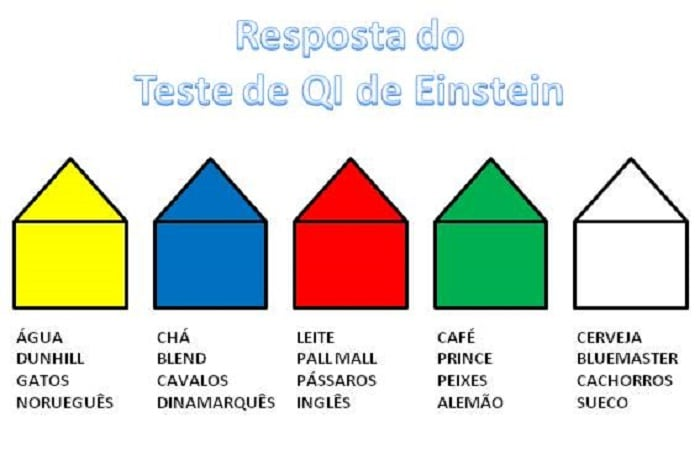

## Referências:
1. https://artificialcognition.github.io/who-owns-the-zebra
2. https://pt.stackoverflow.com/questions/103184/o-que-%C3%A9-um-algoritmo-backtracking